# TP : Prédiction de la consommation énergétique de bâtiments
Dans ce TP, vous allez développer un modèle de prédiction de la consommation énergétique des bâtiments en utilisant un dataset avec différentes caractéristiques. L'objectif est de préparer les données, d'entraîner un modèle de régression et d'évaluer sa performance. Ce modèle sera utilisé pour estimer la consommation de futurs bâtiments, pour lesquels on ne dispose pas encore de relevé fiable.

## Chargement des données et exploration initiale
La première étape consiste à charger les données et à effectuer une première exploration pour comprendre leur structure. Chargez le fichier building_energy_benchmarking.csv et affichez les premières lignes du dataset.

In [2]:
import pandas as pd

energy_df = pd.read_csv("../../../data/building_energy_benchmarking.csv")
print(energy_df.shape)
print(energy_df.columns)
display(energy_df.head())

(3376, 46)
Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
    

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [3]:
energy_df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


## Filtrage des données invalides
Proposer un moyen de filtrer les données en fonction de la valeur dans la colonne `DefaultData`, qui indique si ce sont des données synthétiques, qu'on va considérer comme non représentatives pour notre futur modèle.

In [4]:
energy_df["Outlier"].value_counts()

Outlier
Low outlier     23
High outlier     9
Name: count, dtype: int64

In [5]:
energy_df["Outlier"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3371    NaN
3372    NaN
3373    NaN
3374    NaN
3375    NaN
Name: Outlier, Length: 3376, dtype: object

In [6]:
mask_outlier = energy_df["Outlier"].isna()
energy_df = energy_df[mask_outlier]

In [7]:
energy_df.shape


(3344, 46)

In [8]:
energy_df["DefaultData"]

0       False
1       False
2       False
3       False
4       False
        ...  
3371     True
3372    False
3373    False
3374    False
3375    False
Name: DefaultData, Length: 3344, dtype: bool

In [9]:
mask_default_data = ~energy_df["DefaultData"]

In [10]:
mask_default_data

0        True
1        True
2        True
3        True
4        True
        ...  
3371    False
3372     True
3373     True
3374     True
3375     True
Name: DefaultData, Length: 3344, dtype: bool

In [11]:
energy_df = energy_df[mask_default_data]

## Préparation des données
Il est maintenant temps de préparer les caractéristiques et la cible pour l'entraînement du modèle. Sélectionnez les colonnes pertinentes pour l'entraînement et préparez la variable cible `SiteEnergyUse(kBtu)`.

In [12]:
energy_df["City"].value_counts()

City
Seattle    3233
Name: count, dtype: int64

In [13]:
columns_to_keep = [
    'Neighborhood',
    'YearBuilt',
    'NumberofBuildings',
    'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFAParking',
    #'LargestPropertyUseType',
    #'LargestPropertyUseTypeGFA',
    #'SecondLargestPropertyUseType',
    #'SecondLargestPropertyUseTypeGFA',
    #'ThirdLargestPropertyUseType',
    #'ThirdLargestPropertyUseTypeGFA',
    # 'SteamUse(kBtu)',
    # 'Electricity(kBtu)',
    # 'NaturalGas(kBtu)',
    'SiteEnergyUse(kBtu)'
]

energy_df = energy_df[columns_to_keep]
y = energy_df["SiteEnergyUse(kBtu)"]

In [14]:
energy_df.head()

,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,SiteEnergyUse(kBtu)
0,DOWNTOWN,1927,1.0,12,88434,0,7226362.5
1,DOWNTOWN,1996,1.0,11,103566,15064,8387933.0
2,DOWNTOWN,1969,1.0,41,956110,196718,72587024.0
3,DOWNTOWN,1926,1.0,10,61320,0,6794584.0
4,DOWNTOWN,1980,1.0,18,175580,62000,14172606.0


### Gestion des valeurs manquantes

Avant d'entraîner notre modèle, il est crucial de gérer les valeurs manquantes dans le jeu de données. Les valeurs manquantes peuvent provenir de données non collectées ou d'informations non applicables à certaines propriétés. 

1. Identifiez les colonnes qui contiennent des valeurs manquantes.
2. Décidez d'une stratégie de gestion, comme le remplissage avec une valeur par défaut, la moyenne/médiane ou la suppression des lignes/colonnes concernées.
3. Implémentez cette stratégie pour vous assurer que le jeu de données est prêt pour l'analyse et la modélisation.


In [15]:
energy_df.isnull().sum()

Neighborhood           0
YearBuilt              0
NumberofBuildings      8
NumberofFloors         0
PropertyGFATotal       0
PropertyGFAParking     0
SiteEnergyUse(kBtu)    5
dtype: int64

In [16]:
energy_df.dtypes

Neighborhood            object
YearBuilt                int64
NumberofBuildings      float64
NumberofFloors           int64
PropertyGFATotal         int64
PropertyGFAParking       int64
SiteEnergyUse(kBtu)    float64
dtype: object

In [17]:
energy_df.select_dtypes(include=["float64", "int64"]).columns

Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'SiteEnergyUse(kBtu)'],
      dtype='object')

In [18]:
for col in energy_df.select_dtypes(include=["float64", "int64"]).columns:
    energy_df[col].fillna(energy_df[col].median(), inplace=True)  # en pratique, utiliser plutôt un imputer de scikit-learn par exemple

In [19]:
energy_df.isnull().sum()

Neighborhood           0
YearBuilt              0
NumberofBuildings      0
NumberofFloors         0
PropertyGFATotal       0
PropertyGFAParking     0
SiteEnergyUse(kBtu)    0
dtype: int64

In [20]:
for col in energy_df.select_dtypes(include=["object"]).columns:
    energy_df[col].fillna("Unknown", inplace=True)  # en pratique, utiliser plutôt un imputer de scikit-learn par exemple

In [21]:
energy_df.isnull().sum()

Neighborhood           0
YearBuilt              0
NumberofBuildings      0
NumberofFloors         0
PropertyGFATotal       0
PropertyGFAParking     0
SiteEnergyUse(kBtu)    0
dtype: int64

### Ratios des sources d'énergie

En particulier, même si on ne dispose pas de relevés des valeurs absolues, on va supposer qu'on connaîtra la répartition relative des sources d'énergie du futur bâtiment, et que cela peut avoir un impact sur la modélisation de sa consommation future. Ajoutez une étape pour calculer la proportion de l'énergie totale consommée par chaque source disponible dans le jeu de données.


In [22]:
# energy_df["total"] = + +
# energy_df["natural_gas_proportion"] = energy_df["NaturalGas(kBtu)"] / "total"

# FAIRE LES OPERATIONS EN VECTORIEL

### Encodage personnalisé des types d’usage avec les surfaces

!! Attention question plus difficile !!

Dans cette étape, nous allons encoder les colonnes représentant les types d’usage des bâtiments (type primaire, secondaire, et tertiaire) en créant une nouvelle colonne pour chaque type d’usage unique présent dans le dataset.

Cible -> chaque colonne représentera un type d’usage, et sa valeur contiendra :
- La superficie de l’usage primaire si ce type est l’usage primaire du bâtiment.
- La superficie de l’usage secondaire si ce type est l’usage secondaire.
- La superficie de l’usage tertiaire si ce type est l’usage tertiaire.
- 0 si ce type d’usage n’est pas associé au bâtiment.

Étapes à suivre :
- Identifier toutes les modalités uniques des types d’usage présentes dans les colonnes LargestPropertyUseType, SecondLargestPropertyUseType, et ThirdLargestPropertyUseType.
- Créer une colonne pour chaque type d’usage.
- Renseigner la superficie correspondante pour chaque bâtiment dans la colonne associée au type d’usage, en fonction de son rôle (primaire, secondaire, ou tertiaire).
- Remplir les valeurs par 0 pour les colonnes des types d’usage qui ne s’appliquent pas au bâtiment.

In [23]:
# Votre code ici

In [31]:
energy_df.columns

Index(['Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'SiteEnergyUse(kBtu)'],
      dtype='object')

Créer un X (contenant toutes et uniquement les colonnes explicatives du dataframe) et un y (contenant la cible).

In [32]:
X = energy_df.drop("SiteEnergyUse(kBtu)", axis=1)

## Prétraitement des données : Mise à l'échelle et encodage
Nous devons maintenant normaliser les données numériques et encoder les variables catégorielles. Utilisez `StandardScaler` pour la normalisation et `pd.get_dummies` pour encoder la variable catégorielle `Neighborhood`.

In [33]:
from sklearn.preprocessing import StandardScaler

# Encoder la variable catégorielle 'Neighborhood'
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Afficher les premières lignes après mise à l'échelle et encodage
X_scaled[:5]

array([[-1.26073822, -0.05120873,  1.29323464, -0.03382727, -0.25193963,
        -0.04311974, -0.17680489, -0.09176987, -0.15305272, -0.01758994,
         2.18713101, -0.03519622, -0.39690893, -0.35232192, -0.28634707,
        -0.38375456, -0.21035838, -0.30064574, -0.25679041, -0.11333407,
        -0.05570188, -0.15826421, -0.22057631],
       [ 0.82305844, -0.05120873,  1.11388377,  0.03396391,  0.20483432,
        -0.04311974, -0.17680489, -0.09176987, -0.15305272, -0.01758994,
         2.18713101, -0.03519622, -0.39690893, -0.35232192, -0.28634707,
        -0.38375456, -0.21035838, -0.30064574, -0.25679041, -0.11333407,
        -0.05570188, -0.15826421, -0.22057631],
       [ 0.00765975, -0.05120873,  6.49441003,  3.85335108,  5.71298718,
        -0.04311974, -0.17680489, -0.09176987, -0.15305272, -0.01758994,
         2.18713101, -0.03519622, -0.39690893, -0.35232192, -0.28634707,
        -0.38375456, -0.21035838, -0.30064574, -0.25679041, -0.11333407,
        -0.05570188, -0.1582

## Entraînement du modèle de régression linéaire
Cette cellule utilise un modèle de régression linéaire pour prédire la consommation d'énergie (`SiteEnergyUse(kBtu)`) en fonction des caractéristiques préparées. Elle réalise l'entraînement du modèle sur les données d'entraînement. En adaptant les noms de variables si besoin, l'exécuter et observer son résultat.


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Afficher les coefficients du modèle
model.coef_

array([-5.99896339e+05,  5.97746691e+06,  2.03998325e+05,  1.32575389e+07,
       -1.40698409e+06,  5.32112620e+04,  1.70659564e+05,  1.06183531e+04,
       -1.78216296e+05,  2.19010710e+04,  2.92862604e+05,  2.17626922e+05,
        2.56151396e+05,  8.29093147e+04,  6.75273483e+05,  1.19824169e+05,
       -5.85647078e+04,  5.26939529e+05,  1.55011802e+05, -1.55018038e+04,
        3.60744797e+04,  1.38928298e+04,  6.15778575e+04])

## Évaluation du modèle
Cette cellule sert à évaluer la performance du modèle en calculant l'erreur quadratique moyenne (MSE) et le coefficient de détermination R² sur les données de test. En adaptant les noms de variables si besoin, l'exécuter et observer son résultat.

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 431775744741310.94
R-squared: 0.3341353240290684


## Visualisations des résultats
Enfin, visualisez les résultats en traçant un graphique des prédictions vs valeurs réelles et un histogramme des erreurs.

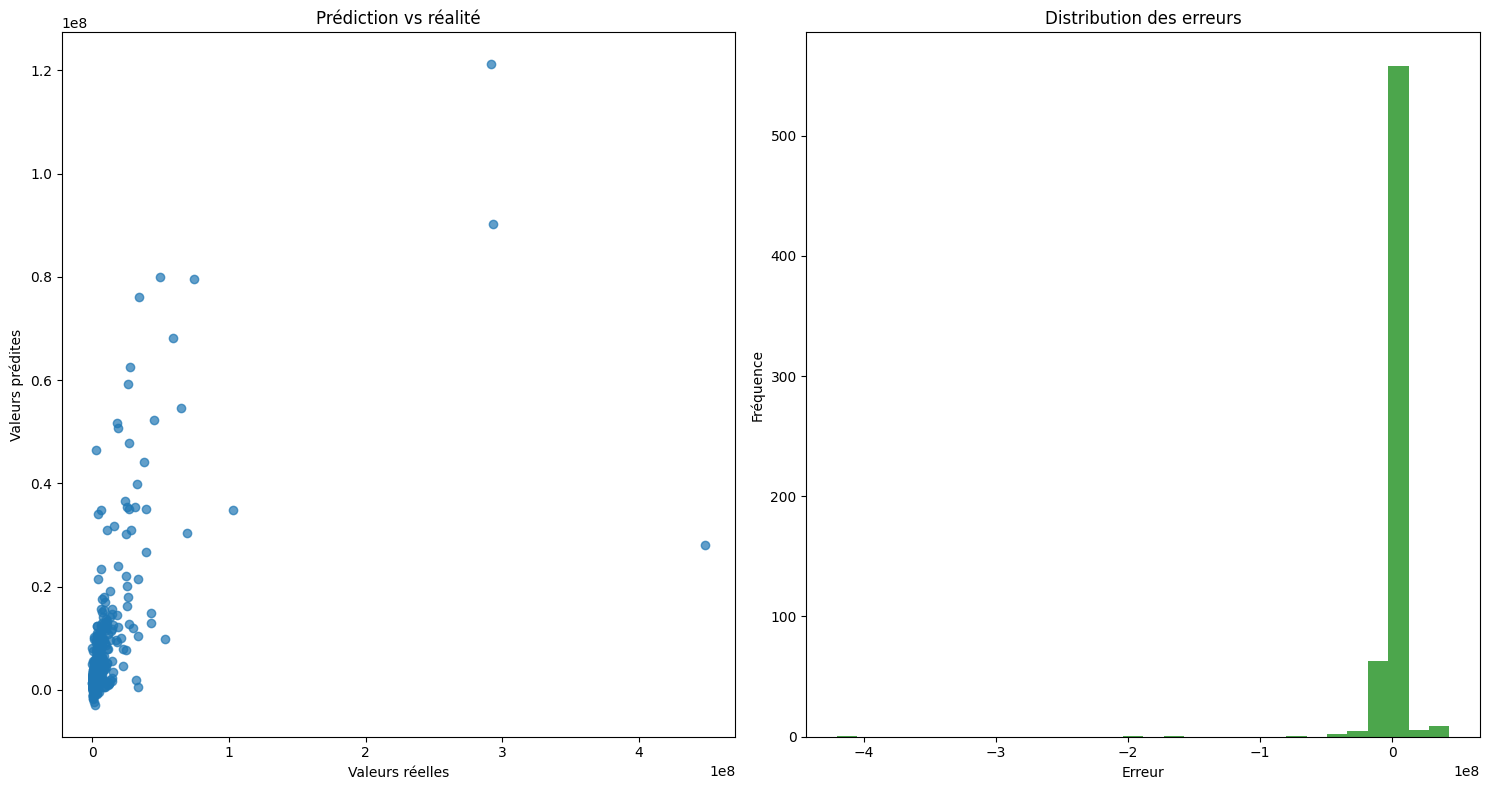

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Prédiction vs réalité")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")

plt.subplot(1, 2, 2)
errors = y_pred - y_test
plt.hist(errors, bins=30, alpha=0.7, color="green")
plt.title("Distribution des erreurs")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()